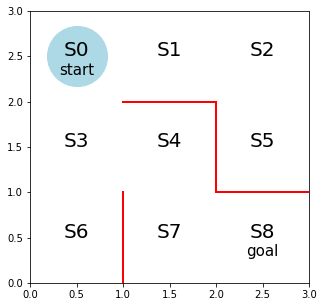

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x=np.arange(0,4,1)
#start mark
line,=ax.plot(0.5,2.5,marker='o',color='lightblue',markersize=60)

grid=np.array([x,x])

plt.figure(figsize=(5,5))
ax=plt.gca()
plt.xlim(0,3)
plt.ylim(0,3)

#迷路の壁を作成
plt.plot((grid[0][1],grid[1][1]),(grid[0][1],grid[1][0]),c='red',linewidth=2)
plt.plot((grid[0][1],grid[1][2]),(grid[0][2],grid[1][2]),c='red',linewidth=2)
plt.plot((grid[0][2],grid[1][2]),(grid[0][2],grid[1][1]),c='red',linewidth=2)
plt.plot((grid[0][3],grid[1][2]),(grid[0][1],grid[1][1]),c='red',linewidth=2)

#迷路の状態を明示
plt.text(0.5,0.5,'S6',size=20,ha='center')
plt.text(0.5,1.5,'S3',size=20,ha='center')
plt.text(0.5,2.5,'S0',size=20,ha='center')
plt.text(0.5,2.3,'start',size=15,ha='center')
plt.text(1.5,0.5,'S7',size=20,ha='center')
plt.text(1.5,1.5,'S4',size=20,ha='center')
plt.text(1.5,2.5,'S1',size=20,ha='center')
plt.text(2.5,0.5,'S8',size=20,ha='center')
plt.text(2.5,0.3,'goal',size=15,ha='center')
plt.text(2.5,1.5,'S5',size=20,ha='center')
plt.text(2.5,2.5,'S2',size=20,ha='center')

plt.show()

#policy array
theta_0=np.array([[np.nan,1,1,np.nan],
                  [np.nan,np.nan,1,1],
                  [np.nan,1,np.nan,1],
                  [1,1,1,np.nan],
                  [np.nan,1,np.nan,np.nan],
                  [1,np.nan,np.nan,np.nan],
                  [1,np.nan,np.nan,np.nan],
                  [1,np.nan,1,np.nan]
                  ])

In [2]:
#policyを確率行列に変換する関数
#次の状態と行動を取得する関数 eps-greedy
#学習アルゴリズム
#goal関数

In [11]:
def policy_to_prob(theta):
    s,t=theta.shape
    prob_array=np.zeros([s,t])
    
    for i in range(s):
        prob_array[i,:]=theta[i,:]/np.nansum(theta[i,:])
        
    prob_array=np.nan_to_num(prob_array)
    return prob_array

def get_next_s_a(now_state,epsilon,prob_array,Q):
    direction=['up','down','right','left']
    #ランダムに行動を選択
    if np.random.rand()< epsilon:
        next_direction=np.random.choice(direction,p=prob_array[now_state,:])
    else:
        idx=np.nanargmax(Q[now_state,:])
        next_direction=direction[idx]
        
    if next_direction==direction[0]:
        action=0
        next_state=now_state-3
    elif next_direction==direction[1]:
        action=1
        next_state=now_state+3
    elif next_direction==direction[2]:
        action=2
        next_state=now_state+1
    elif next_direction==direction[3]:
        action=3
        next_state=now_state-1
        
    return [action,next_state]


In [12]:
#学習アルゴリズム　Q-learning
def Q_learn(now_state,now_action,lr,gamma,r,Q,next_state):
    if next_state==8:
        Q[now_state,now_action]=Q[now_state,now_action]+lr*(r-Q[now_state,now_action])
    else:
        #next_stateではactionはなんでもよい
        Q[now_state,now_action]=Q[now_state,now_action]+lr*(r+gamma*np.nanmax(Q[next_state,:])-Q[now_state,now_action])
        
    return Q


In [13]:
#goal関数　行動と状態の時間履歴と価値関数を返す
def get_goal(epsilon,prob_array,Q,lr,gamma):
    #初期化
    now_state=0
    s_a_history=[[now_state,np.nan]]
    
    while True:
        [now_action,next_state]=get_next_s_a(now_state,epsilon,prob_array,Q)
        s_a_history[-1][1]=now_action
        
        s_a_history.append([next_state,np.nan])
        
        if next_state==8:
            r=1
            next_action=np.nan
        else:
            r=0
            [next_action,_]=get_next_s_a(next_state,epsilon,prob_array,Q)
            
        #価値関数の更新
        Q=Q_learn(now_state,now_action,lr,gamma,r,Q,next_state)
        
        if next_state==8:
            break
        else:
            now_state=next_state
            
    return [s_a_history,Q]
            

In [15]:
#迷路をsolve
prob_array=policy_to_prob(theta_0)
epsilon=0.5
lr=0.1
gamma=0.9
a,b=theta_0.shape
Q=np.random.rand(a,b)*theta_0
v=np.nanmax(Q,axis=1)
is_continue=True
step=1

#状態価値関数を各ステップで格納
V=[]
V.append(v)

while is_continue:
    epsilon=epsilon/2
    [s_a_history,Q]=get_goal(epsilon,prob_array,Q,lr,gamma)
    
    #状態価値関数
    new_v=np.nanmax(Q,axis=1)
    error=np.sum(np.abs(new_v-v))
    print(error)
    v=new_v
    V.append(v)
    
    print('迷路を解くのにかかったステップ数は%dです'%(len(s_a_history)-1))
    step+=1
    
    if step>100:
        break
    

1.03125454002
迷路を解くのにかかったステップ数は308です
0.131185594336
迷路を解くのにかかったステップ数は34です
0.0987311520285
迷路を解くのにかかったステップ数は32です
0.0707683087161
迷路を解くのにかかったステップ数は4です
0.0636311337138
迷路を解くのにかかったステップ数は4です
0.0572868451584
迷路を解くのにかかったステップ数は4です
0.0516527844843
迷路を解くのにかかったステップ数は4です
0.0466532552343
迷路を解くのにかかったステップ数は4です
0.043275309005
迷路を解くのにかかったステップ数は4です
0.0409677761114
迷路を解くのにかかったステップ数は4です
0.0387710900481
迷路を解くのにかかったステップ数は4です
0.0366849509074
迷路を解くのにかかったステップ数は4です
0.0347074305355
迷路を解くのにかかったステップ数は4です
0.0328354291914
迷路を解くのにかかったステップ数は4です
0.031065037352
迷路を解くのにかかったステップ数は4です
0.0293918197481
迷路を解くのにかかったステップ数は4です
0.0278110359102
迷路を解くのにかかったステップ数は4です
0.026317809127
迷路を解くのにかかったステップ数は4です
0.0249072537124
迷路を解くのにかかったステップ数は4です
0.0235745687847
迷路を解くのにかかったステップ数は4です
0.0223151053366
迷路を解くのにかかったステップ数は4です
0.0211244121749
迷路を解くのにかかったステップ数は4です
0.0199982653096
迷路を解くのにかかったステップ数は4です
0.0189326845261
迷路を解くのにかかったステップ数は4です
0.0179239401802
迷路を解くのにかかったステップ数は4です
0.0169685526667
迷路を解くのにかかったステップ数は4です
0.0160632865326
迷路を解くのにかかったステップ数は4です
0.0